<a href="https://colab.research.google.com/github/erhnk/Churn-Modelling/blob/main/Naive_Bayes_%C4%B0le_Model_Kurma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAİVE BAYES İLE SINIFLANDIRMA**

In [ ]:
#Standart parametreler ile her bir dağılıma göre model kuralım ve isabetliliğini ölçelim.

GaussianNB

In [ ]:
gauss_siniflandirici = GaussianNB()
gauss_siniflandirici.fit(X_train,y_train)
gauss_y_pred = gauss_siniflandirici.predict(X_test) 

In [ ]:
print('isabetlilik değeri:', accuracy_score(y_test,gauss_y_pred))

isabetlilik değeri: 0.806


GaussianNB için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


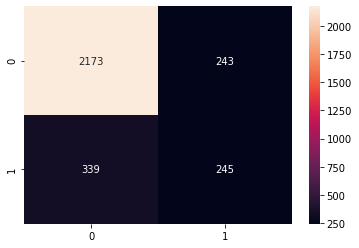

In [ ]:
gauss_confusion = sns.heatmap(confusion_matrix(y_test,gauss_y_pred), annot=True, fmt='g');
print("GaussianNB için confusion_matrix :\n\n",gauss_confusion)

MultinomialNB

In [ ]:
Multinomial_siniflandirici = MultinomialNB()
Multinomial_siniflandirici.fit(X_train,y_train)
Multinomial_y_pred = Multinomial_siniflandirici.predict(X_test) 

In [ ]:
print('isabetlilik değeri:', accuracy_score(y_test,Multinomial_y_pred))

isabetlilik değeri: 0.8166666666666667


MultinomimalNB için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


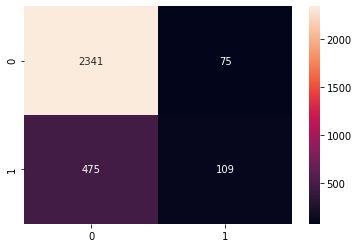

In [ ]:
Multinomial_confusion = sns.heatmap(confusion_matrix(y_test,Multinomial_y_pred), annot=True, fmt='g');
print("MultinomimalNB için confusion_matrix :\n\n",Multinomial_confusion)

ComplementNB

In [ ]:
Complement_siniflandirici = ComplementNB()
Complement_siniflandirici.fit(X_train,y_train)
Complement_y_pred = Complement_siniflandirici.predict(X_test) 

In [ ]:
print('isabetlilik değeri:', accuracy_score(y_test,Complement_y_pred))

isabetlilik değeri: 0.718


ComplementNB için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


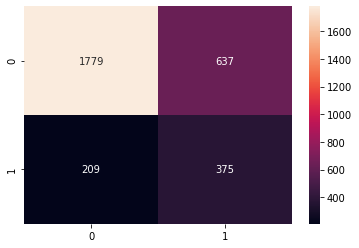

In [ ]:
ComplementNB_confusion = sns.heatmap(confusion_matrix(y_test,Complement_y_pred), annot=True, fmt='g');
print("ComplementNB için confusion_matrix :\n\n",ComplementNB_confusion)

BernoulliNB

In [ ]:
Bernoulli_siniflandirici = BernoulliNB()
Bernoulli_siniflandirici.fit(X_train,y_train)
Bernoulli_y_pred = Bernoulli_siniflandirici.predict(X_test) 

In [ ]:
print('isabetlilik değeri:', accuracy_score(y_test,Bernoulli_y_pred))

isabetlilik değeri: 0.8253333333333334


BernoulliNB için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


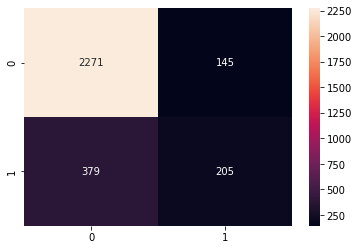

In [362]:
BernoulliNB_confusion = sns.heatmap(confusion_matrix(y_test,Bernoulli_y_pred), annot=True, fmt='g');
print("BernoulliNB için confusion_matrix :\n\n",BernoulliNB_confusion)

In [ ]:
#Standart parametreler ile kurulmuş modeller incelendiğinde isabetlilik skoru en yüksek olan 0.8253 isabetlilik skoruna sahip BernoulliNB ile kurulan modeldir..
#GaussianNB ile kurulan model 2418 doğru tahmin yaparken MultinomimalNB ile kurulan model 2450, ComplementNB ile kurulan model 2154 ve BernoulliNB ile kurulan model 2476 doğru sınıflandırma yapmıştır.
#Bankadan ayrılanları tespit etmede en başarılı model 375 doğru sınıflandırma yapan ComplementNB ile kurulan modeldir.
#Standart paremetreler ile kurulan modeller arasında en çok doğru sınıflandırma yapan BernoulliNB ile kurulan model olduğu görülebilir.

**NAİVE BAYES SINIFLANDIRMASI İÇİN MODEL TUNİNG**

GaussianNB için Model Tuning

In [ ]:
tuned_parameters = [{'var_smoothing' :np.logspace(-9,9,100)}]

cValidation_search1 = GridSearchCV(gauss_siniflandirici, tuned_parameters, cv=10, scoring ='accuracy',n_jobs=-1,error_score=0)
cValidation_search1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=0,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'var_smoothing': array([1.00000000e-09, 1.51991108e-09, 2.31012970e-09, 3.51119173e-09,
       5.33669923e-09, 8.11130831e-09, 1.23284674e-08, 1.87381742e-08,
       2.84803587e-08, 4.32876128e-08, 6.57933225e-08, 1.00000000e-07,
       1.51991108e-07, 2.310...
       3.51119173e+05, 5.33669923e+05, 8.11130831e+05, 1.23284674e+06,
       1.87381742e+06, 2.84803587e+06, 4.32876128e+06, 6.57933225e+06,
       1.00000000e+07, 1.51991108e+07, 2.31012970e+07, 3.51119173e+07,
       5.33669923e+07, 8.11130831e+07, 1.23284674e+08, 1.87381742e+08,
       2.84803587e+08, 4.32876128e+08, 6.57933225e+08, 1.00000000e+09])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print('En iyi model : ', cValidation_search1.best_params_)
print('Bu modelin ortalama skoru (accuracy) :', cValidation_search1.best_score_)

En iyi model :  {'var_smoothing': 0.2310129700083158}
Bu modelin ortalama skoru (accuracy) : 0.8118571428571428


In [ ]:
gauss_siniflandirici1 = GaussianNB(var_smoothing=0.2310129700083158)
gauss_siniflandirici1.fit(X_train,y_train)
gauss_y_pred1 = gauss_siniflandirici1.predict(X_test) 

In [ ]:
print('isabetlilik değeri:', accuracy_score(y_test,gauss_y_pred1))

isabetlilik değeri: 0.824


GaussianNB için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


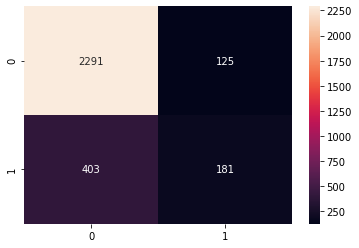

In [ ]:
GaussianNB_confusion1 = sns.heatmap(confusion_matrix(y_test,gauss_y_pred1), annot=True, fmt='g');
print("GaussianNB için confusion_matrix :\n\n",GaussianNB_confusion1)

In [ ]:
print(classification_report(y_test,gauss_y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2416
           1       0.59      0.31      0.41       584

    accuracy                           0.82      3000
   macro avg       0.72      0.63      0.65      3000
weighted avg       0.80      0.82      0.80      3000



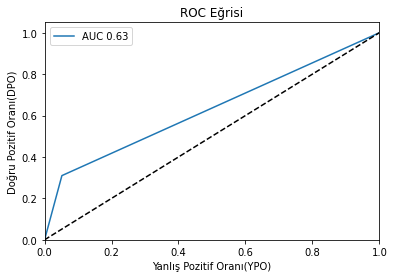

In [ ]:
ypo,dpo,esikDeger = roc_curve(y_test,gauss_y_pred1)
aucDegeri = auc(ypo,dpo)
plt.figure()
plt.plot(ypo,dpo,label = "AUC %0.2f" %aucDegeri)
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Yanlış Pozitif Oranı(YPO)")
plt.ylabel("Doğru Pozitif Oranı(DPO)")
plt.title("ROC Eğrisi")
plt.legend(loc = "best")
plt.show()

MultinomimalNB için Model Tuning

In [ ]:
tuned_parameters2 = [{'alpha' :np.logspace(-9,9,100)}]

cValidation_search2 = GridSearchCV(Multinomial_siniflandirici, tuned_parameters2, cv=10, scoring ='accuracy',n_jobs=-1,error_score=0)
cValidation_search2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=0,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': array([1.00000000e-09, 1.51991108e-09, 2.31012970e-09, 3.51119173e-09,
       5.33669923e-09, 8.11130831e-09, 1.23284674e-08, 1.87381742e-08,
       2.84803587e-08, 4.32876128e-08, 6.57933225e-08, 1.00000000e-07,
       1.51991108e-07,...
       3.51119173e+05, 5.33669923e+05, 8.11130831e+05, 1.23284674e+06,
       1.87381742e+06, 2.84803587e+06, 4.32876128e+06, 6.57933225e+06,
       1.00000000e+07, 1.51991108e+07, 2.31012970e+07, 3.51119173e+07,
       5.33669923e+07, 8.11130831e+07, 1.23284674e+08, 1.87381742e+08,
       2.84803587e+08, 4.32876128e+08, 6.57933225e+08, 1.00000000e+09])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print('En iyi model : ', cValidation_search2.best_params_)
print('Bu modelin ortalama skoru (accuracy) :', cValidation_search2.best_score_)

En iyi model :  {'alpha': 81.11308307896888}
Bu modelin ortalama skoru (accuracy) : 0.8097142857142858


In [ ]:
Multinomial_siniflandirici1 = MultinomialNB(alpha=81.11308307896888)
Multinomial_siniflandirici1.fit(X_train,y_train)
Multinomial_y_pred1 = Multinomial_siniflandirici1.predict(X_test) 

In [ ]:
print('isabetlilik değeri:', accuracy_score(y_test,Multinomial_y_pred1))

isabetlilik değeri: 0.8203333333333334


MultinomimalNB için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


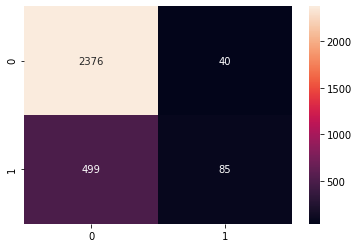

In [ ]:
MultinomimalNB_confusion1 = sns.heatmap(confusion_matrix(y_test,Multinomial_y_pred1), annot=True, fmt='g');
print("MultinomimalNB için confusion_matrix :\n\n",MultinomimalNB_confusion1)

In [ ]:
print(classification_report(y_test,Multinomial_y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2416
           1       0.59      0.19      0.28       584

    accuracy                           0.82      3000
   macro avg       0.71      0.58      0.59      3000
weighted avg       0.78      0.82      0.78      3000



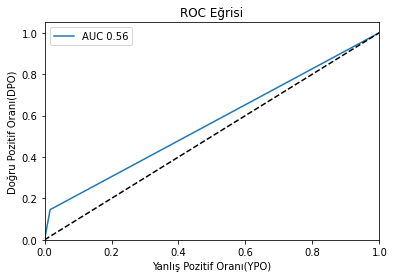

In [ ]:
ypo,dpo,esikDeger = roc_curve(y_test,Multinomial_y_pred1)
aucDegeri = auc(ypo,dpo)
plt.figure()
plt.plot(ypo,dpo,label = "AUC %0.2f" %aucDegeri)
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Yanlış Pozitif Oranı(YPO)")
plt.ylabel("Doğru Pozitif Oranı(DPO)")
plt.title("ROC Eğrisi")
plt.legend(loc = "best")
plt.show()

ComplementNB için Model Tuning

In [ ]:
tuned_parameters3 = [{'alpha' :np.logspace(-9,9,100)}]

cValidation_search3 = GridSearchCV(Complement_siniflandirici, tuned_parameters3, cv=10, scoring ='accuracy',n_jobs=-1,error_score=0)
cValidation_search3.fit(X_train, y_train) 

GridSearchCV(cv=10, error_score=0,
             estimator=ComplementNB(alpha=1.0, class_prior=None, fit_prior=True,
                                    norm=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': array([1.00000000e-09, 1.51991108e-09, 2.31012970e-09, 3.51119173e-09,
       5.33669923e-09, 8.11130831e-09, 1.23284674e-08, 1.87381742e-08,
       2.84803587e-08, 4.32876128e-08, 6.57933225e-08, 1.00000000e-07,
       1.519...
       3.51119173e+05, 5.33669923e+05, 8.11130831e+05, 1.23284674e+06,
       1.87381742e+06, 2.84803587e+06, 4.32876128e+06, 6.57933225e+06,
       1.00000000e+07, 1.51991108e+07, 2.31012970e+07, 3.51119173e+07,
       5.33669923e+07, 8.11130831e+07, 1.23284674e+08, 1.87381742e+08,
       2.84803587e+08, 4.32876128e+08, 6.57933225e+08, 1.00000000e+09])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print('En iyi model : ', cValidation_search3.best_params_)
print('Bu modelin ortalama skoru (accuracy) :', cValidation_search3.best_score_)

En iyi model :  {'alpha': 3511.1917342151273}
Bu modelin ortalama skoru (accuracy) : 0.8005714285714285


In [ ]:
Complement_siniflandirici1 = ComplementNB(alpha=3511.1917342151273)
Complement_siniflandirici1.fit(X_train,y_train)
Complement_y_pred1 = Complement_siniflandirici1.predict(X_test) 

In [ ]:
print('isabetlilik değeri:', accuracy_score(y_test,Complement_y_pred1))

isabetlilik değeri: 0.814


ComplementNB için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


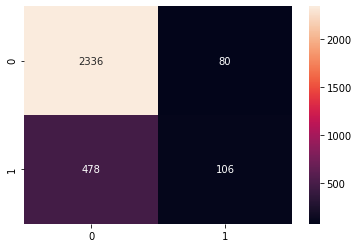

In [363]:
ComplementNB_confusion1= sns.heatmap(confusion_matrix(y_test,Complement_y_pred1), annot=True, fmt='g');
print("ComplementNB için confusion_matrix :\n\n",ComplementNB_confusion1)

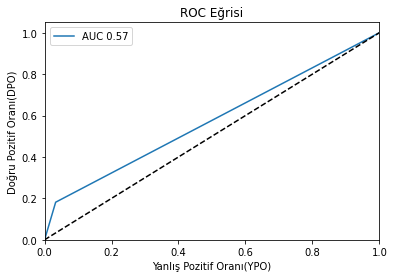

In [ ]:
ypo,dpo,esikDeger = roc_curve(y_test,Complement_y_pred1)
aucDegeri = auc(ypo,dpo)
plt.figure()
plt.plot(ypo,dpo,label = "AUC %0.2f" %aucDegeri)
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Yanlış Pozitif Oranı(YPO)")
plt.ylabel("Doğru Pozitif Oranı(DPO)")
plt.title("ROC Eğrisi")
plt.legend(loc = "best")
plt.show()

In [365]:
print(classification_report(y_test,Complement_y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2416
           1       0.57      0.18      0.28       584

    accuracy                           0.81      3000
   macro avg       0.70      0.57      0.58      3000
weighted avg       0.78      0.81      0.77      3000



BernoulliNB için Model Tuning

In [ ]:
tuned_parameters4 = [{'alpha' :np.logspace(-9,9,100)}]

cValidation_search4 = GridSearchCV(Bernoulli_siniflandirici, tuned_parameters4, cv=10, scoring ='accuracy',n_jobs=-1,error_score=0)
cValidation_search4.fit(X_train, y_train) 

GridSearchCV(cv=10, error_score=0,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': array([1.00000000e-09, 1.51991108e-09, 2.31012970e-09, 3.51119173e-09,
       5.33669923e-09, 8.11130831e-09, 1.23284674e-08, 1.87381742e-08,
       2.84803587e-08, 4.32876128e-08, 6.57933225e-08, 1.00000000e-07,
       1.51...
       3.51119173e+05, 5.33669923e+05, 8.11130831e+05, 1.23284674e+06,
       1.87381742e+06, 2.84803587e+06, 4.32876128e+06, 6.57933225e+06,
       1.00000000e+07, 1.51991108e+07, 2.31012970e+07, 3.51119173e+07,
       5.33669923e+07, 8.11130831e+07, 1.23284674e+08, 1.87381742e+08,
       2.84803587e+08, 4.32876128e+08, 6.57933225e+08, 1.00000000e+09])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print('En iyi model : ', cValidation_search4.best_params_)
print('Bu modelin ortalama skoru (accuracy) :', cValidation_search4.best_score_)

En iyi model :  {'alpha': 81.11308307896888}
Bu modelin ortalama skoru (accuracy) : 0.8160000000000001


In [ ]:
Bernoulli_siniflandirici1 = BernoulliNB(alpha=81.11308307896888)
Bernoulli_siniflandirici1.fit(X_train,y_train)
Bernoulli_y_pred1 = Bernoulli_siniflandirici1.predict(X_test) 

In [ ]:
print('isabetlilik değeri:', accuracy_score(y_test,Bernoulli_y_pred1))

isabetlilik değeri: 0.8286666666666667


BernoulliNB için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


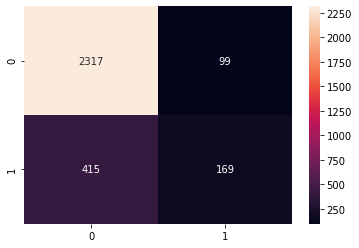

In [364]:
BernoulliNB_confusion1= sns.heatmap(confusion_matrix(y_test,Bernoulli_y_pred1), annot=True, fmt='g');
print("BernoulliNB için confusion_matrix :\n\n",BernoulliNB_confusion1)

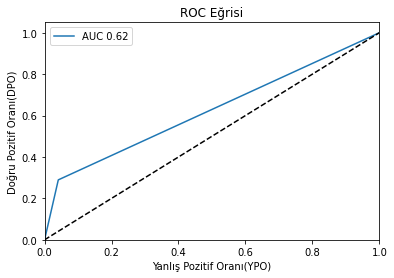

In [ ]:
ypo,dpo,esikDeger = roc_curve(y_test,Bernoulli_y_pred1)
aucDegeri = auc(ypo,dpo)
plt.figure()
plt.plot(ypo,dpo,label = "AUC %0.2f" %aucDegeri)
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Yanlış Pozitif Oranı(YPO)")
plt.ylabel("Doğru Pozitif Oranı(DPO)")
plt.title("ROC Eğrisi")
plt.legend(loc = "best")
plt.show()

In [366]:
print(classification_report(y_test,Bernoulli_y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2416
           1       0.63      0.29      0.40       584

    accuracy                           0.83      3000
   macro avg       0.74      0.62      0.65      3000
weighted avg       0.81      0.83      0.80      3000



In [ ]:
#Yeni parametreler ile kurulmuş modeller incelendiğinde isabetlilik skoru en yüksek olan 0.8286 isabetlilik skoruna sahip BernoulliNB ile kurulan modeldir.
#GaussianNB ile kurulan model 2472 doğru tahmin yaparken MultinomimalNB ile kurulan model 2461, ComplementNB ile kurulan model 2442 ve BernoulliNB ile kurulan model 2486 doğru sınıflandırma yapmıştır.
#AUC skoru en yüksek olan model 0.63 ile GaussianNB'dir.
#Yeni paremetreler ile kurulan modeller arasında en çok doğru sınıflandırma yapan BernoulliNB ile kurulan model olduğu görülebilir.
#f1-score'u en yüksek olan model 0.41 ile GaussianNB'dir
#Naive Bayes ile kurulan modellerin isabetlilik skoru artarken, 
#tüm modellerin performanslarına bakıldığında bankada kalan müşterileri tahmin etme gücü artarken bankadan ayrılan müşterileri tahmin etme gücü azalmıştır.